Trabalho probabilidade e estatística

Análise Estatística de Padrões de Saúde: Avaliando atividade física, sono e ritmo calórico com dados de wearables  

Carregar os dados do kaggle:

In [2]:
!pip install kagglehub[pandas-datasets]

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/fitbit")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fitbit' dataset.
Path to dataset files: /kaggle/input/fitbit


Importar os arquivos csv, cria os Dataframes e trata os dados:

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

basePath = '/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/'

# cria os dataframes

ativDiaria = pd.read_csv(basePath + 'dailyActivity_merged.csv')

# converte datas para dateTIme
ativDiaria['ActivityDate'] = pd.to_datetime(ativDiaria["ActivityDate"])

# Tira NaN
ativDiaria = ativDiaria.dropna()

ativDiaria.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Foram escolhidas 3 variáveis quantitativas: Passos totais, Calorias e Minutos de atividade intensa; E uma variável qualitativa: "Nível de Atividade", baseada na quantidade de passos do usuário.

In [28]:
media_passos = ativDiaria['TotalSteps'].mean()
mediana_passos = ativDiaria['TotalSteps'].median()

media_calorias = ativDiaria['Calories'].mean()
mediana_calorias = ativDiaria['Calories'].median()

print(f"Passos: \nMédia: {media_passos} Mediana: {mediana_passos}")
print(f"Calorias: \nMédia: {media_calorias} Mediana: {mediana_calorias}")

Passos: 
Média: 7637.9106382978725 Mediana: 7405.5
Calorias: 
Média: 2303.609574468085 Mediana: 2134.0


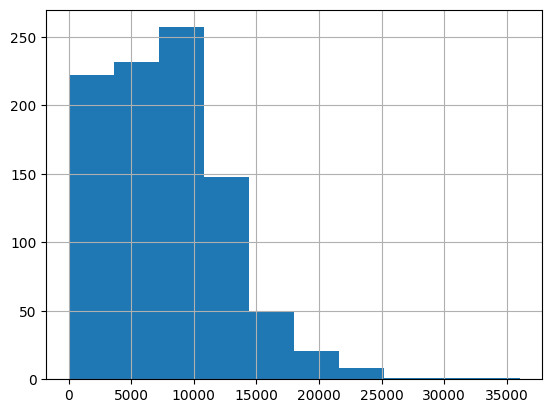

In [26]:
ativDiaria['TotalSteps'].hist()

plt.show()

<Axes: title={'center': 'TotalSteps'}, xlabel='Id'>

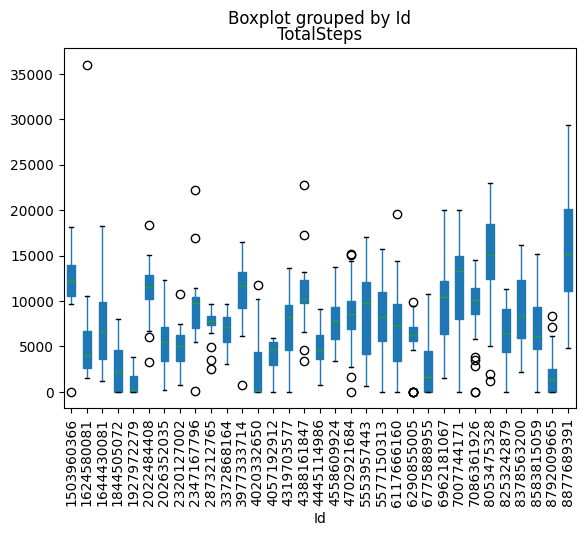

In [31]:
ativDiaria.boxplot(column='TotalSteps', by='Id', grid=False, rot=90, patch_artist=True)

In [37]:
import numpy as np
import scipy.stats as st

dados = ativDiaria["TotalSteps"]

confianca = 0.95
graus_de_liberdade = len(dados) - 1
media = np.mean(dados)
erro_padrao = st.sem(dados)

intervalo = st.t.interval(confianca,
                          graus_de_liberdade,
                          loc=media,
                          scale=erro_padrao)

print(f"Média da Amostra: {media:.2f}")
print(f"Intervalo de Confiança (95%): entre {intervalo[0]:.2f} e {intervalo[1]:.2f}")

Média da Amostra: 7637.91
Intervalo de Confiança (95%): entre 7312.28 e 7963.54


In [38]:
# Resumo estatístico (Contagem, Média, Desvio Padrão, Mín, Quartis, Máx)
resumo_passos = ativDiaria['TotalSteps'].describe()

# Cálculo da Moda (pode haver mais de uma)
moda_passos = ativDiaria['TotalSteps'].mode()[0]

# Cálculo do Coeficiente de Variação (CV) em %
cv_passos = (ativDiaria['TotalSteps'].std() / ativDiaria['TotalSteps'].mean()) * 100

print(resumo_passos)
print(f"Moda: {moda_passos}")
print(f"Coeficiente de Variação: {cv_passos:.2f}%")

count      940.000000
mean      7637.910638
std       5087.150742
min          0.000000
25%       3789.750000
50%       7405.500000
75%      10727.000000
max      36019.000000
Name: TotalSteps, dtype: float64
Moda: 0
Coeficiente de Variação: 66.60%


In [40]:
import pandas as pd
from scipy.stats import ttest_1samp

# 1. Tabela de Distribuição (Variável Qualitativa)
# Criando categorias baseadas nos passos
def classificar(passos):
    if passos < 5000: return 'Sedentário (<5k)'
    elif passos < 10000: return 'Pouco Ativo (5k-10k)'
    else: return 'Ativo (>10k)'

# Cria a coluna nova e conta
ativDiaria['NivelAtividade'] = ativDiaria['TotalSteps'].apply(classificar)
tabela_freq = ativDiaria['NivelAtividade'].value_counts()
print("--- Tabela de Distribuição ---")
print(tabela_freq)
print("\n")

# 2. Teste de Hipótese
# Testar se a média é estatisticamente igual a 10.000 passos
stat, p_valor = ttest_1samp(ativDiaria['TotalSteps'], 10000)

print("--- Teste de Hipótese (Média = 10.000?) ---")
print(f"Estatística T: {stat:.2f}")
print(f"Valor P: {p_valor}")
if p_valor < 0.05:
    print("Resultado: Rejeita-se a hipótese nula (A média NÃO é 10.000).")
else:
    print("Resultado: Não se rejeita a hipótese nula.")

--- Tabela de Distribuição ---
NivelAtividade
Pouco Ativo (5k-10k)    334
Ativo (>10k)            303
Sedentário (<5k)        303
Name: count, dtype: int64


--- Teste de Hipótese (Média = 10.000?) ---
Estatística T: -14.24
Valor P: 8.739087931327881e-42
Resultado: Rejeita-se a hipótese nula (A média NÃO é 10.000).
